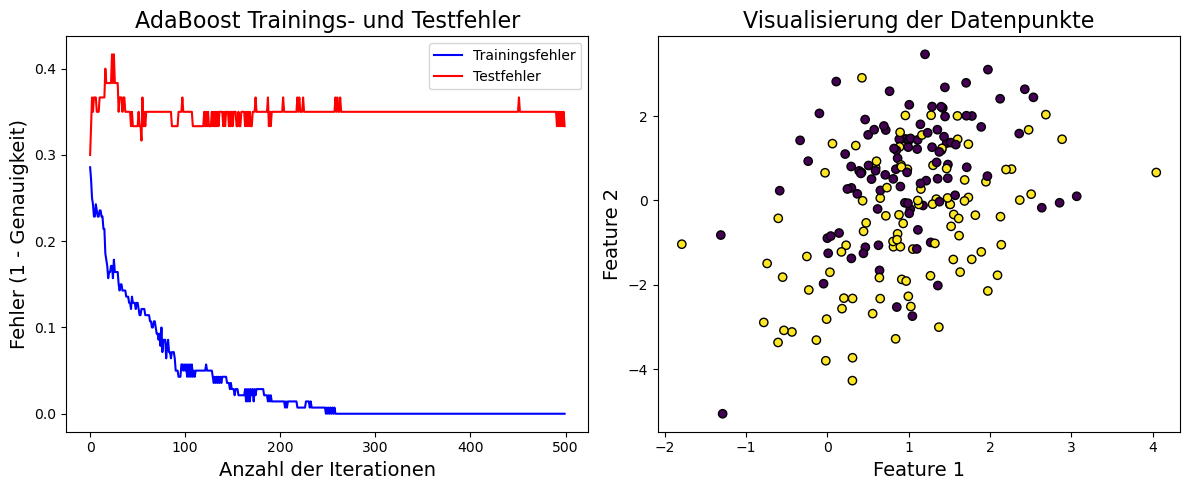

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Datensatz erstellen und aufteilen
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, flip_y=0.4, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# AdaBoost-Modell initialisieren
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=500, random_state=42)

# Trainings- und Testfehler aufzeichnen
train_errors, test_errors = [], []

# Modelle iterativ trainieren und Fehler aufzeichnen
for i in range(1, 501):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

# Erster Plot: Trainingsfehler, Testfehler und Datenpunkte
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_errors, label='Trainingsfehler', color='blue')
plt.plot(test_errors, label='Testfehler', color='red')
plt.title('AdaBoost Trainings- und Testfehler', fontsize=16)
plt.xlabel('Anzahl der Iterationen', fontsize=14)
plt.ylabel('Fehler (1 - Genauigkeit)', fontsize=14)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Visualisierung der Datenpunkte", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.tight_layout()
plt.savefig('../Images/AdaBoost_Error_and_Data.png')
plt.show()


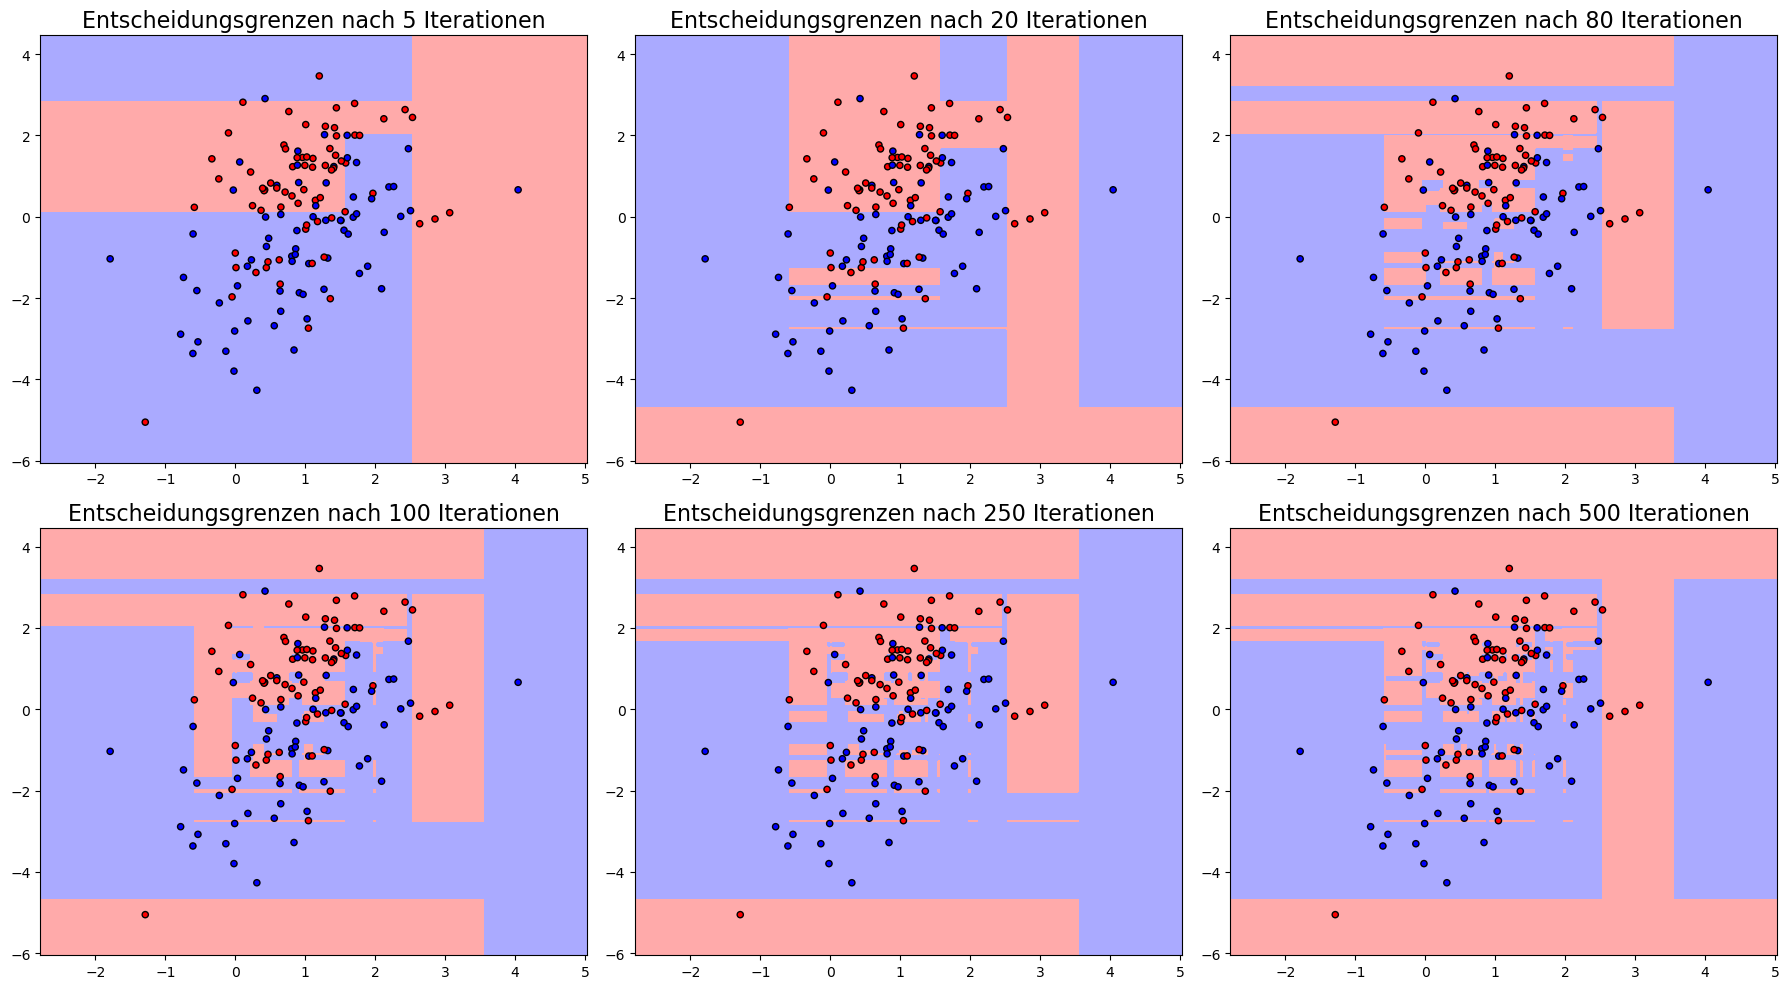

In [2]:
from matplotlib.colors import ListedColormap

# Funktion, um Entscheidungsgrenzen zu plotten
def plot_decision_boundaries(X, y, model, iteration, ax):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(f"Entscheidungsgrenzen nach {iteration} Iterationen", fontsize=16)

# Zweiter Plot: Entscheidungsgrenzen
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
iterations = [5, 20, 80, 100, 250, 500]
for i, iter in enumerate(iterations):
    model.set_params(n_estimators=iter)
    model.fit(X_train, y_train)
    plot_decision_boundaries(X_train, y_train, model, iter, axes[i//3, i%3])

plt.tight_layout()
plt.savefig('../Images/AdaBoost_Decision_Boundaries.png')
plt.show()
